In [13]:
############################################################
# Initial setup
############################################################

import pystan
import stan_utility
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

from scipy.special import expit, logit
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1,
            # grid='off'
            
            )

light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"

import vapeplot
vapeplot.set_palette('vaporwave')

In [5]:
model = stan_utility.compile_model('generate_data_2D.stan')
fit = model.sampling(seed=194838, algorithm='Fixed_param', iter=1, chains=1)

data = dict(N = fit.extract()['N'].astype(np.int64),
            x_obs = fit.extract()['x_obs'][0,:],
            y_obs = fit.extract()['y_obs'][0,:])

pystan.stan_rdump(data, 'selection_2D.data.R')

Using cached StanModel


In [8]:
############################################################
# Fit model
############################################################

data = pystan.read_rdump('selection_2D.data.R')

model = stan_utility.compile_model('selection_2D.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d9d1bbe50c5ea4dd397693534b580d98 NOW.


In [9]:
fit = model.sampling(data=data, chains=4, seed=4938483,
                     iter=24000,
                     thin=6,
                     
                     
                     control=dict(adapt_delta=0.9, max_treedepth=12))

/home/jburgess/.venv/science/local/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


n_eff / iter for parameter mu_y is 0.000625!
n_eff / iter for parameter Lambda is 0.0005!
n_eff / iter for parameter x_tilde[41] is 0.000875!
n_eff / iter for parameter x_tilde[42] is 0.00075!
n_eff / iter for parameter x_tilde[43] is 0.00075!
n_eff / iter for parameter x_tilde[44] is 0.000625!
n_eff / iter for parameter x_tilde[45] is 0.000625!
n_eff / iter for parameter x_tilde[46] is 0.0005!
n_eff / iter for parameter x_tilde[47] is 0.0005!
n_eff / iter for parameter x_tilde[48] is 0.0005!
n_eff / iter for parameter x_tilde[49] is 0.0005!
n_eff / iter for parameter x_tilde[50] is 0.0005!
n_eff / iter for parameter x_tilde[51] is 0.0005!
n_eff / iter for parameter x_tilde[52] is 0.000375!
n_eff / iter for parameter x_tilde[53] is 0.0005!
n_eff / iter for parameter x_tilde[54] is 0.0005!
n_eff / iter for parameter x_tilde[55] is 0.000375!
n_eff / iter for parameter x_tilde[56] is 0.000375!
n_eff / iter for parameter x_tilde[57] is 0.0005!
n_eff / iter for parameter x_tilde[58] is 0.00

<IPython.core.display.Javascript object>


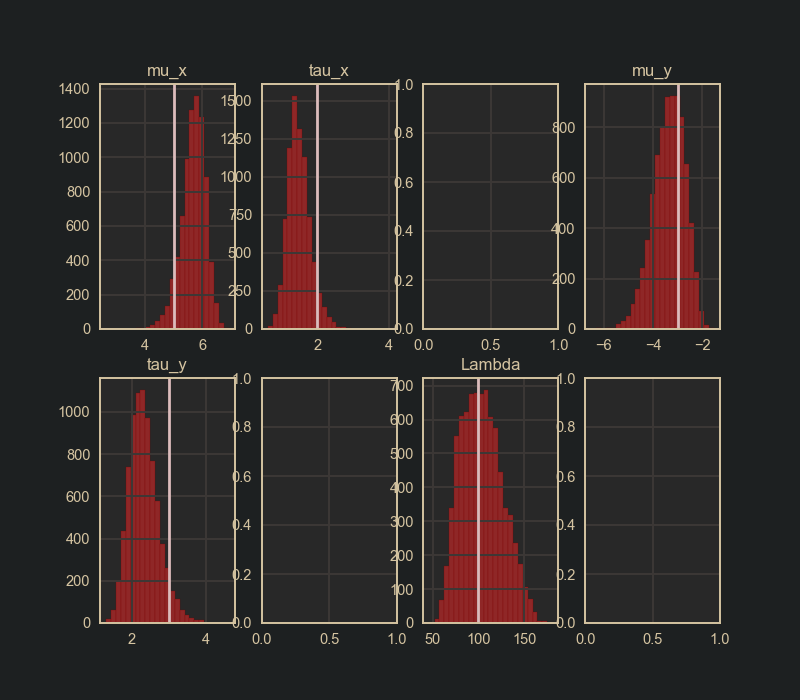

In [10]:
# Check diagnostics
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 4)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("mu_x")
axarr[0, 0].hist(params['mu_x'], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=5, linewidth=2, color=light)

axarr[0, 1].set_title("tau_x")
axarr[0, 1].hist(params['tau_x'], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=2, linewidth=2, color=light)

# axarr[0, 2].set_title("sigma_x")
# axarr[0, 2].hist(params['sigma_x'], bins = 25, color = dark, ec = dark_highlight)
# axarr[0, 2].axvline(x=1, linewidth=2, color=light)

axarr[0, 3].set_title("mu_y")
axarr[0, 3].hist(params['mu_y'], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 3].axvline(x=-3, linewidth=2, color=light)

axarr[1, 0].set_title("tau_y")
axarr[1, 0].hist(params['tau_y'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=3, linewidth=2, color=light)

# axarr[1, 1].set_title("sigma_y")
# axarr[1, 1].hist(params['sigma_y'], bins = 25, color = dark, ec = dark_highlight)
# axarr[1, 1].axvline(x=0.75, linewidth=2, color=light)

axarr[1, 2].set_title("Lambda")
axarr[1, 2].hist(params['Lambda'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 2].axvline(x=100, linewidth=2, color=light)

plot.show()

<IPython.core.display.Javascript object>


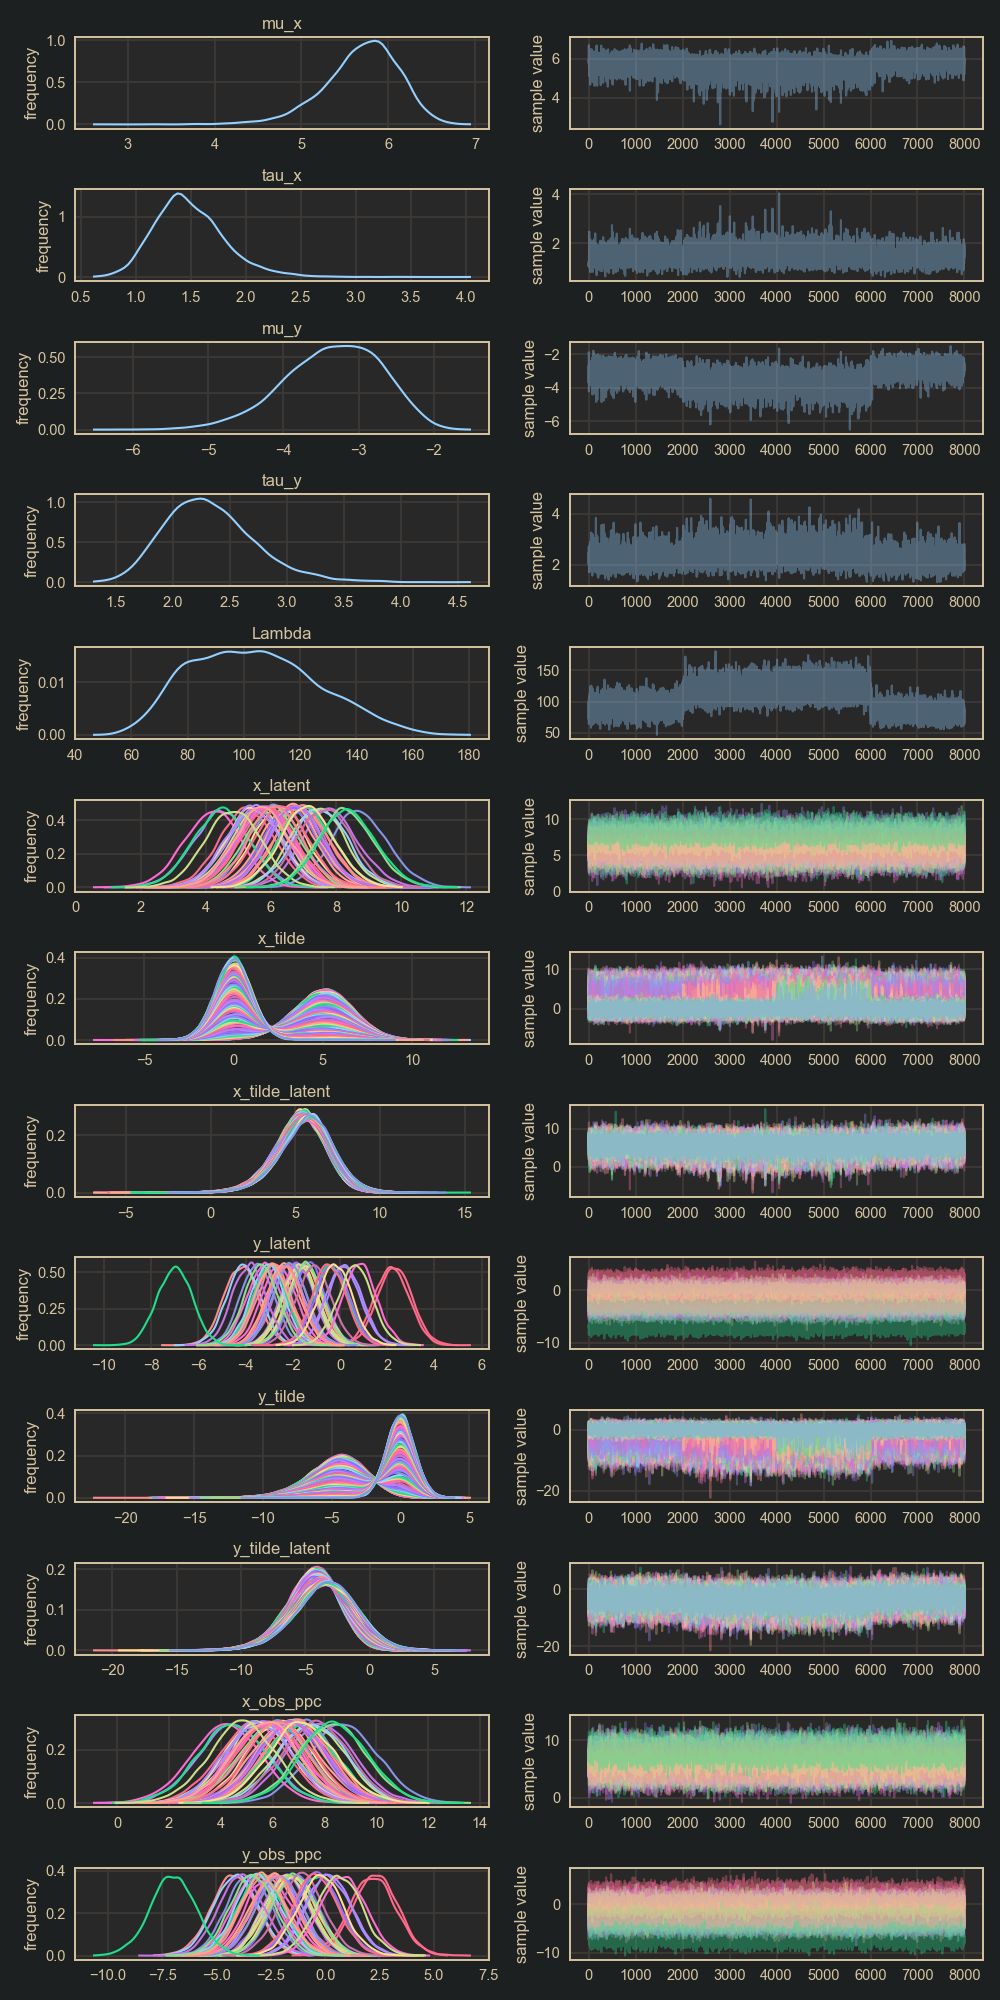

In [22]:
fig = fit.plot()
fig.set_size_inches(10,20)
plot.tight_layout()

In [20]:
fig.set_size_inches?